In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [37]:
data_size = 2000
step_size = 20
split_rate = 0.7

x_dataset = []
y_dataset = []
for i in range(data_size):
    f = [np.sin(i/100.) + np.random.randn()]
    t = f[0]*0.5
    if i > 3:
        t += x_dataset[-1][0]*0.3 + x_dataset[-2][0]*0.5
    x_dataset.append(f)
    y_dataset.append(t)

dataset_x = np.array(x_dataset)
dataset_y = np.array(y_dataset)

x_dataset = np.array(x_dataset).reshape((-1,step_size,1))
y_dataset = np.array(y_dataset).reshape((-1,step_size))

idx = int(len(x_dataset) * split_rate)
train_x_dataset = x_dataset[:idx]
train_y_dataset = y_dataset[:idx]
test_x_dataset = x_dataset[idx:]
test_y_dataset = y_dataset[idx:]

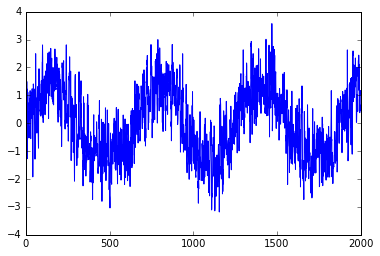

In [38]:
plt.plot(dataset_y)

In [39]:
reg = LinearRegression()
reg.fit(X=dataset_x[:1500],y=dataset_y[:1500])
print reg.coef_,reg.intercept_
reg.score(X=dataset_x[1500:],y=dataset_y[1500:])

[ 0.78551687] 0.0518732891598


0.54062836589363117

In [40]:
print train_x_dataset.shape,train_y_dataset.shape
print test_x_dataset.shape,test_y_dataset.shape

(70, 20, 1) (70, 20)
(30, 20, 1) (30, 20)


1.06922 [0.718548]
0.265236 [0.25881815]
0.205616 [0.20036812]
0.0830855 [0.086034968]
0.0833018 [0.084068485]
0.0713687 [0.069557354]
0.0715116 [0.066246629]
0.0646453 [0.067095943]
0.0657057 [0.066048145]
0.0666052 [0.06623511]
0.06178 [0.062601104]
0.0635292 [0.061650869]
0.0599133 [0.064385131]
0.0587107 [0.062500939]
0.0620799 [0.065730825]
0.0629335 [0.06469959]
0.0586127 [0.065533608]
0.0606025 [0.059813105]
0.0612332 [0.063697889]
0.0629344 [0.062920049]


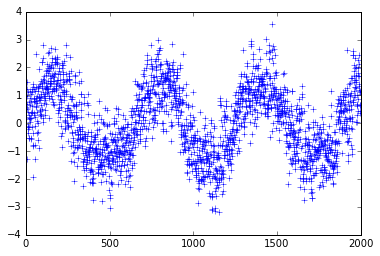

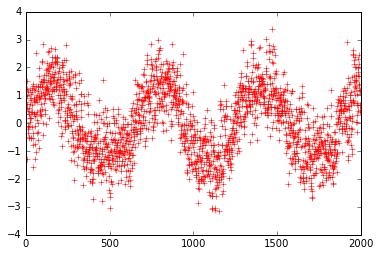

In [51]:
tf.reset_default_graph()

num_hidden = 24
x = tf.placeholder(tf.float32,[None,20,1])
y = tf.placeholder(tf.float32,[None,20])
cell = tf.contrib.rnn.LSTMCell(num_hidden)
val, state = tf.nn.dynamic_rnn(cell,x,dtype=tf.float32)
val = tf.reshape(val,(-1,24))

w = tf.Variable(tf.truncated_normal([24,1]),name='w')
b = tf.Variable(tf.constant(0.1))

o = tf.matmul(val,w) + b
loss = tf.reduce_mean(tf.abs(o - tf.reshape(y,(-1,1))))
grad = tf.train.AdamOptimizer(0.01).minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for i in range(1000):
        l,_ = sess.run([loss,grad],{x:train_x_dataset,y:train_y_dataset})
        if i % 50 == 0:
            d = sess.run([loss],{x:test_x_dataset,y:test_y_dataset})
            print l,d
            
    prediction = np.array(sess.run([o],{x:x_dataset,y:y_dataset})).reshape(-1)
    plt.plot(dataset_y,'b+')
    plt.show()
    plt.plot(prediction,'r+')
    plt.show()